Dataset description:
    
This census income dataset is from the 1994 Census Bureau and the task is to predict whether a given adult makes more than $50,000 a year based attributes such as education, hours of work per week, etc..

The target variable for this dataset is 'Income'.

In [183]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [143]:
#Loading the dataset(Creating the dataframe)
df=pd.read_csv('income.csv')

In [144]:
df.head()   #first five rows of the dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [145]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [146]:
df.shape     #shape of the dataset

(32561, 15)

In [147]:
#Checking the datatypes
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [148]:
#Checking the null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [149]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [150]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [151]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [152]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [153]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

Dropping Education because'education.num'column is enough, Final Weight can be dropped because of highly discrete data so not useful.

In [154]:
df=df.drop(['education','fnlwgt'], axis = 1)
df.head(1)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K


In [155]:
df.nunique()

age                73
workclass           9
education.num      16
marital.status      7
occupation         15
relationship        6
race                5
sex                 2
capital.gain      119
capital.loss       92
hours.per.week     94
native.country     42
income              2
dtype: int64

In [156]:
df['capital.gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
5178        97
3103        97
4386        70
5013        69
8614        55
3325        53
2174        48
10520       43
4064        42
4650        41
14084       41
20051       37
3137        37
27828       34
594         34
3908        32
2829        31
13550       27
6849        27
14344       26
1055        25
2885        24
3411        24
4787        23
2176        23
3464        23
9386        22
2597        20
4101        20
2407        19
4865        17
2202        16
1506        15
3942        14
3674        14
4508        12
4416        12
3781        12
2580        12
10605       12
2907        11
25236       11
5455        11
6497        11
2354        11
2635        11
2463        11
2964         9
2105         9
6418         9
7430         9
2414         8
914          8
2977         8
1151         8
3471         8
4934         7
1471         7
1831         7
1797         7
3818         7
1409      

In [157]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

After checking the value_counts of the columns,we found out that three columns 'Native-country','Occupation',and 'Workclass'are having some missing values which need to be replaced.

In [158]:
#Filling ? values
#replace the values with mode
df['workclass']=df['workclass'].replace('?', 'Private')
df['occupation']=df['occupation'].replace('?', 'Prof-specialty')
df['native.country']=df['native.country'].replace('?', 'United-States')

In [159]:
df.head(15)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,United-States,>50K


In [160]:
df['workclass']

0                 Private
1                 Private
2                 Private
3                 Private
4                 Private
5                 Private
6                 Private
7               State-gov
8             Federal-gov
9                 Private
10                Private
11       Self-emp-not-inc
12                Private
13                Private
14                Private
15                Private
16                Private
17                Private
18                Private
19                Private
20                Private
21                Private
22                Private
23                Private
24                Private
25                Private
26                Private
27                Private
28           Self-emp-inc
29                Private
30                Private
31           Self-emp-inc
32                Private
33                Private
34       Self-emp-not-inc
35            Federal-gov
36                Private
37                Private
38       Sel

In [161]:
#Describe the dataset
df.describe().T       #T-transpose

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


Now,we will encode the columns so that we can convert the object olumns into numeric.

We will go with Label Encoding

In [162]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['marital.status'] = le.fit_transform(df['marital.status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native.country'] = le.fit_transform(df['native.country'])
df['income'] = le.fit_transform(df['income'])

In [163]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,10,5,9,3,4,0,0,3900,40,38,0


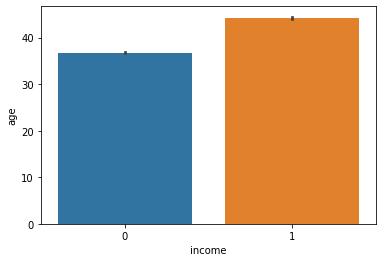

In [164]:
#Data visualization
sns.barplot(x = 'income', y = 'age', data = df)

It can be seen that above 40 years,people are earning more than $50,000 a year.

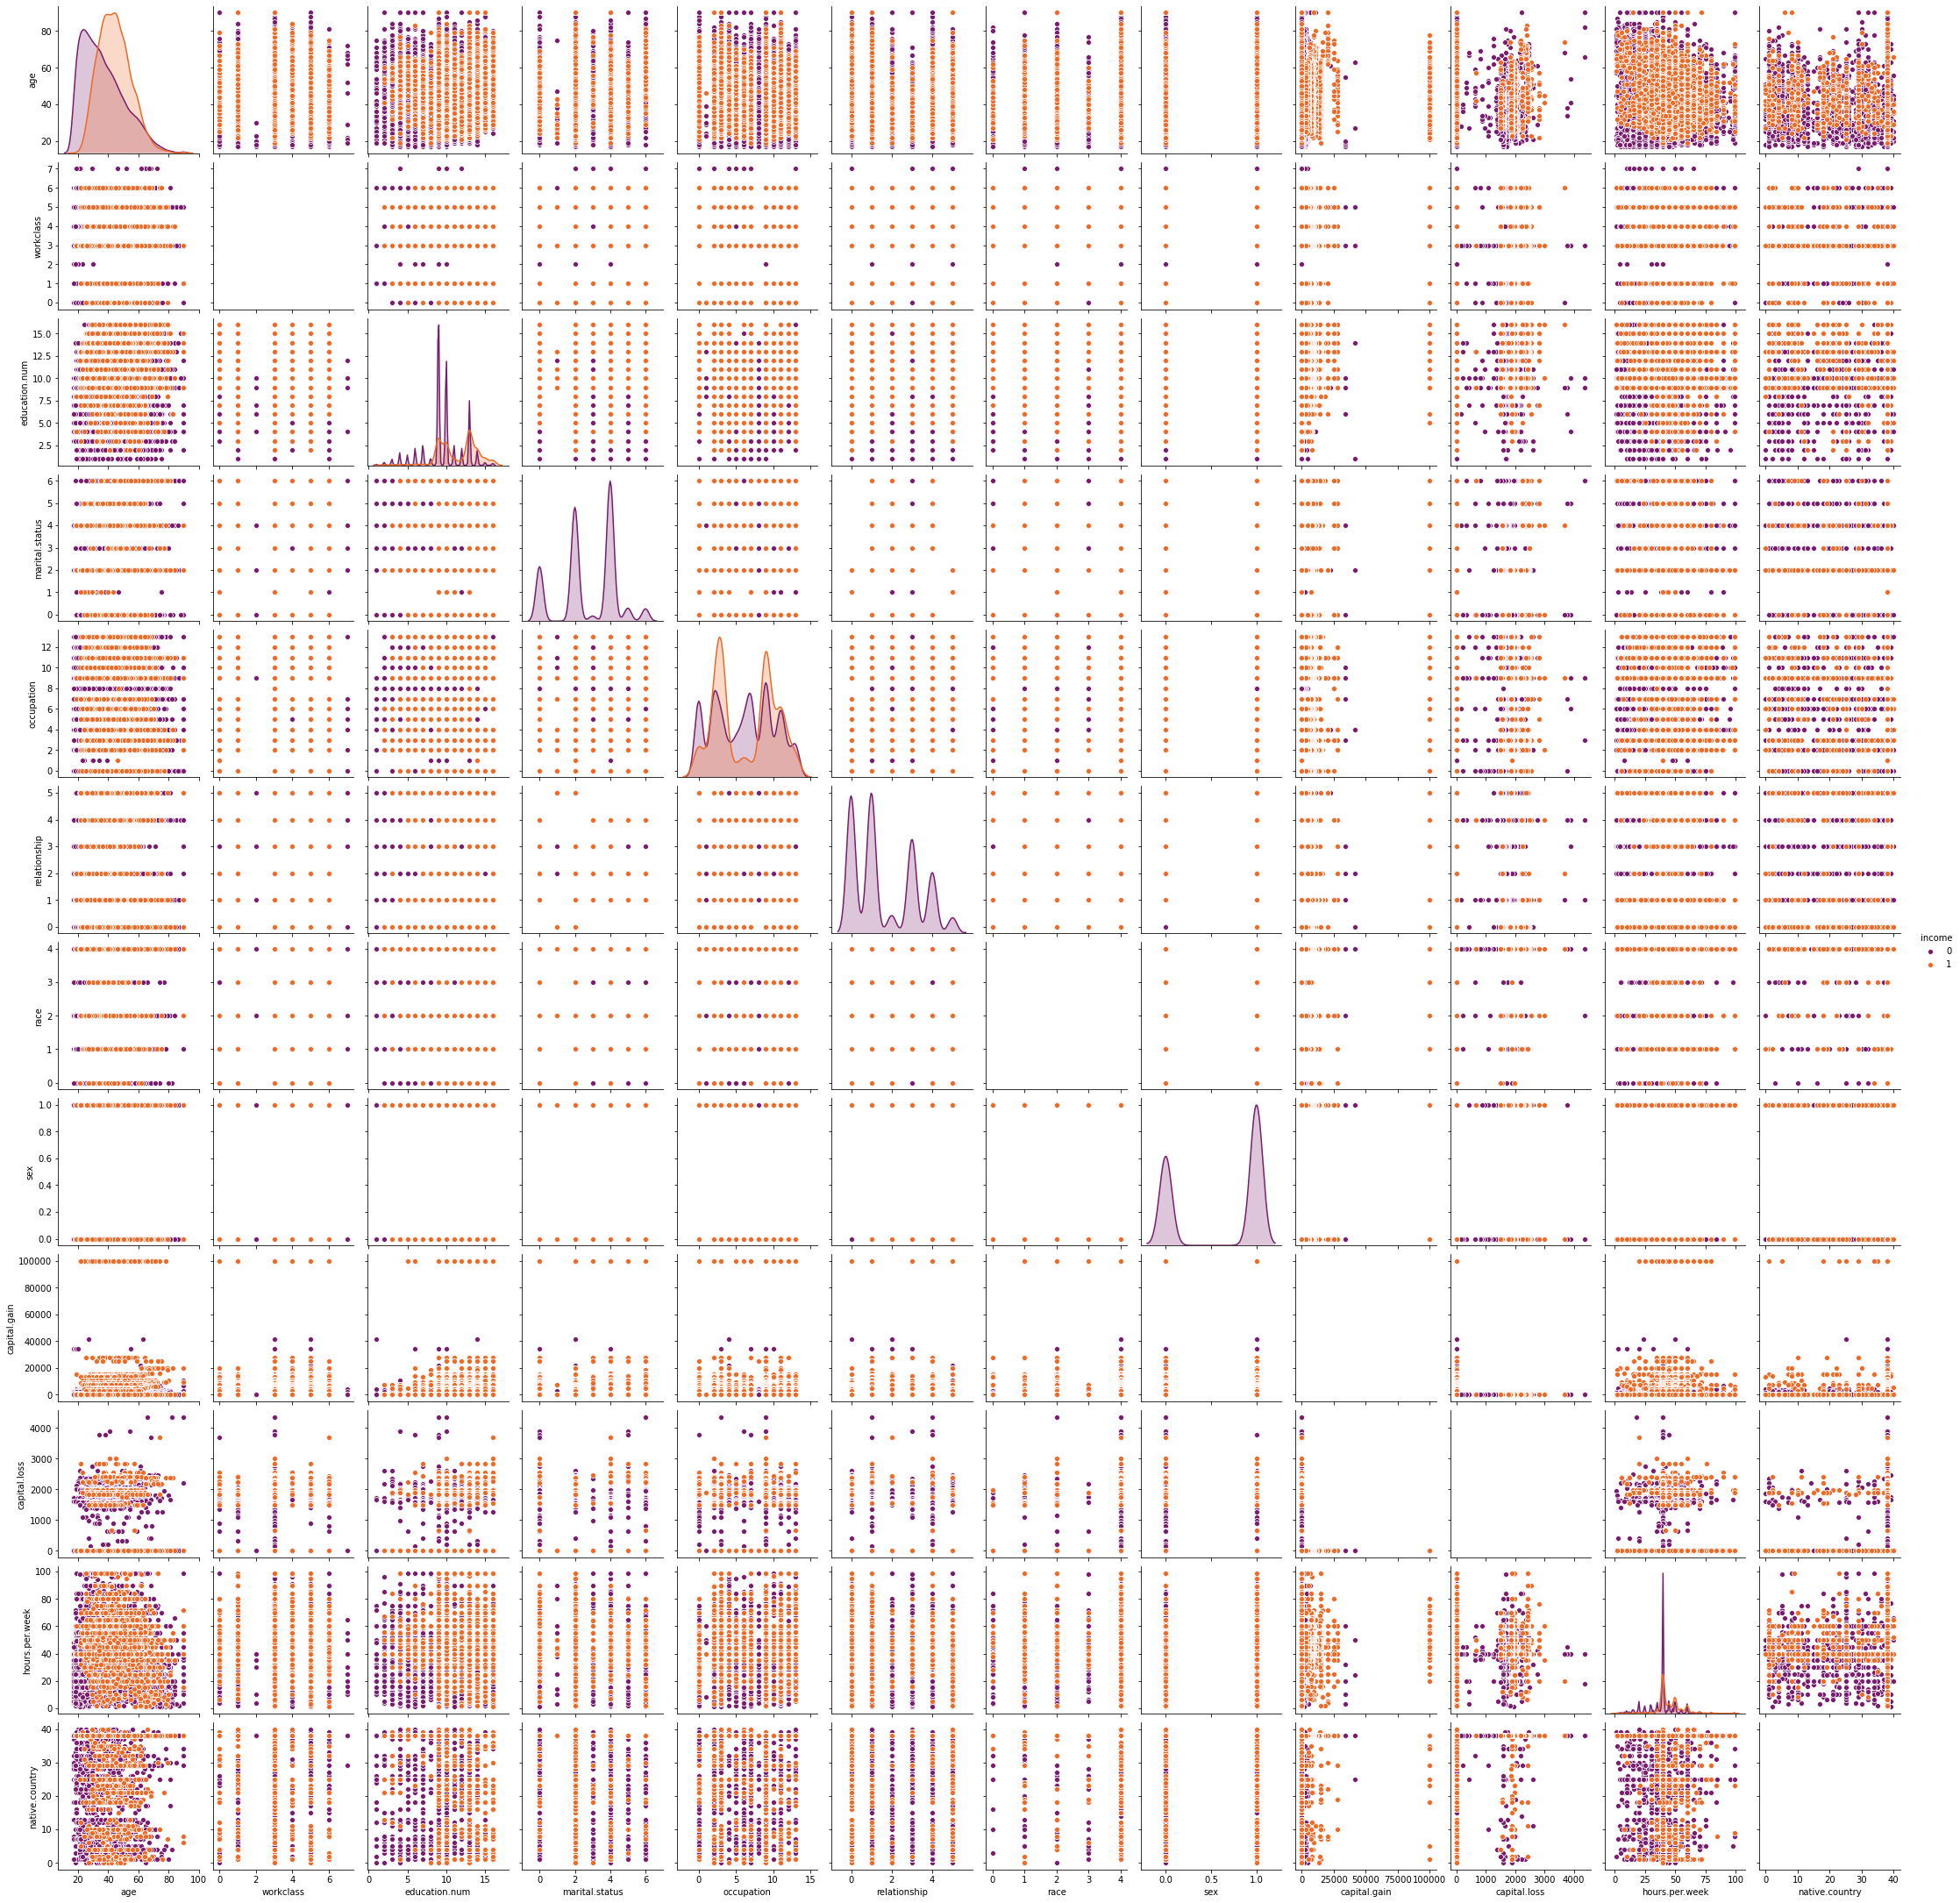

In [165]:
#sns.pairplot(df, hue = 'income', palette = 'inferno')

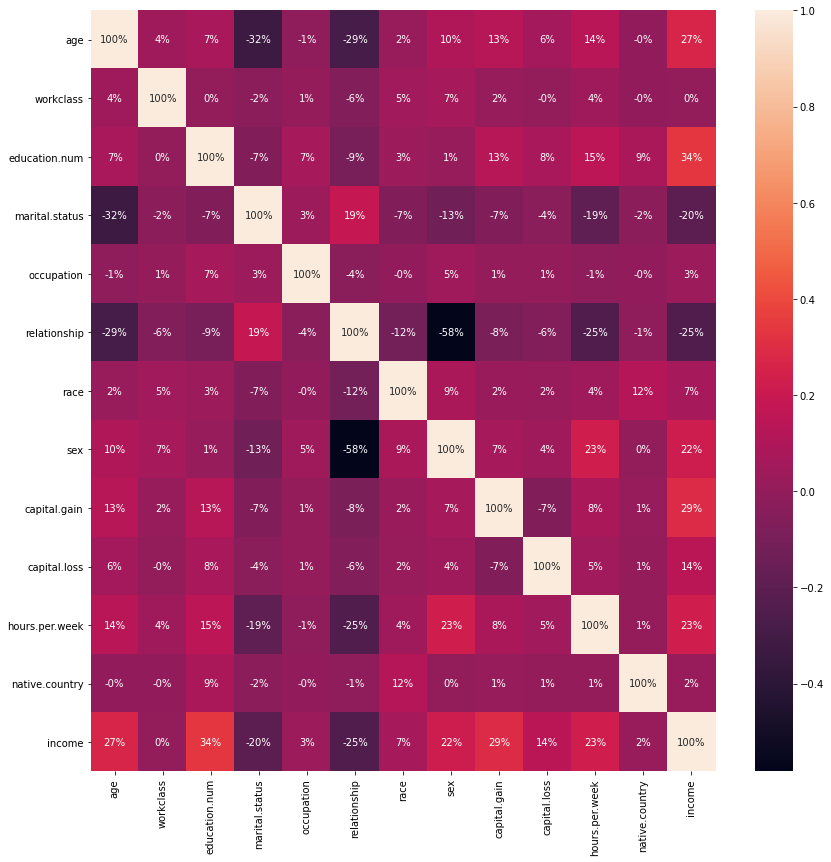

In [181]:
#Heatmap to show the correlation among the datas
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

'capital.gain','education.num',and 'age' are highly correlated with the target variable 'income'.

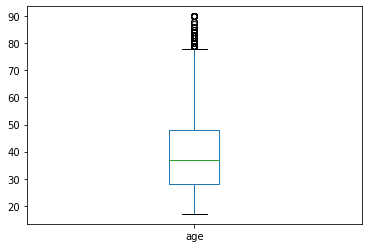

In [166]:
#Checking for outliers in the int type columns using boxplots
df['age'].plot.box()

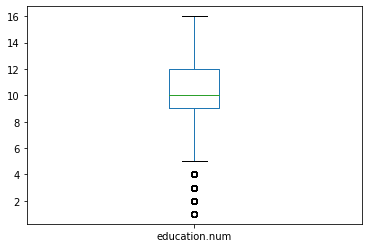

In [167]:
df['education.num'].plot.box()

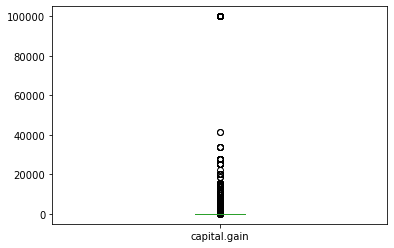

In [168]:
df['capital.gain'].plot.box()

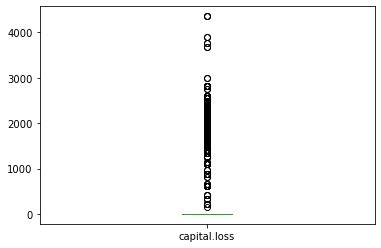

In [169]:
df['capital.loss'].plot.box()

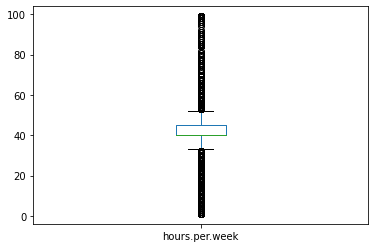

In [170]:
df['hours.per.week'].plot.box()

In [171]:
#Removing outliers
z=np.abs(zscore(df))
z

array([[3.76961234, 0.08529633, 0.42005962, ..., 0.03542945, 0.26136999,
        0.56319851],
       [3.18311167, 0.08529633, 0.42005962, ..., 1.81720429, 0.26136999,
        0.56319851],
       [2.01011032, 0.08529633, 0.03136003, ..., 0.03542945, 0.26136999,
        0.56319851],
       ...,
       [0.10398314, 0.08529633, 0.42005962, ..., 0.03542945, 0.26136999,
        1.77557289],
       [1.42360965, 0.08529633, 0.42005962, ..., 0.03542945, 0.26136999,
        0.56319851],
       [1.21564337, 0.08529633, 0.42005962, ..., 1.65522476, 0.26136999,
        0.56319851]])

In [172]:
threshold=3
print(np.where(z>3))

(array([    0,     0,     1, ..., 32536, 32552, 32554], dtype=int64), array([0, 9, 0, ..., 6, 6, 6], dtype=int64))


In [173]:
print('shape before removing the outliers:',df.shape)
dfnew=df[(z<3).all(axis=1)]
print('shape after removing the outliers:',dfnew.shape)

shape before removing the outliers: (32561, 13)
shape after removing the outliers: (28082, 13)


In [174]:
#%data loss calculation
loss_percent=(32561-28082)/32561*100
print(loss_percent)

13.755720033168513


13% data loss is not acceptable,so we will not go with outlier removal. 

In [175]:
#Checking the skewness in data
df.skew()

age                0.558743
workclass          0.076469
education.num     -0.311676
marital.status    -0.013508
occupation         0.000565
relationship       0.786818
race              -2.435386
sex               -0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
native.country    -4.243158
income             1.212430
dtype: float64

In [176]:
#Removing skewness using'log1p' method
skew=('age','capital.gain','capital.loss')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [177]:
df.skew()

age              -0.113341
workclass         0.076469
education.num    -0.311676
marital.status   -0.013508
occupation        0.000565
relationship      0.786818
race             -2.435386
sex              -0.719293
capital.gain      3.096144
capital.loss      4.307537
hours.per.week    0.227643
native.country   -4.243158
income            1.212430
dtype: float64

Skewness is removed to some extent. And we have removed skewness from only the int columns because we dont go for skewness removal in object type columns.

In [178]:
#Splitting the independent and target variable in x and y
x=df.drop('income',axis=1)
y=df['income']

In [179]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

# Model building

In [186]:
#Using multiple Algorithms for calculating the best algo which suits best for our data set
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
max_accuracy_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        acc_sc=accuracy_score(test_y,pre)
        print('accuracy score correspond to random state',r_state,'is',acc_sc)
        if acc_sc>max_accuracy_score:
            max_accuracy_score=acc_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('max accuracy score correspond to random state',final_state,'is',max_accuracy_score,'and model is',final_model)

accuracy score correspond to random state 40 is 0.818537130094919
accuracy score correspond to random state 40 is 0.8078354736646194
accuracy score correspond to random state 40 is 0.8074632421366089
accuracy score correspond to random state 40 is 0.8243997766610832
accuracy score correspond to random state 40 is 0.8428252372975991
accuracy score correspond to random state 41 is 0.8146286990508096
accuracy score correspond to random state 41 is 0.8070910106085986
accuracy score correspond to random state 41 is 0.8117439047087288
accuracy score correspond to random state 41 is 0.8278429182951796
accuracy score correspond to random state 41 is 0.8427321794155965
accuracy score correspond to random state 42 is 0.8186301879769217
accuracy score correspond to random state 42 is 0.8072771263726037
accuracy score correspond to random state 42 is 0.8170482039828774
accuracy score correspond to random state 42 is 0.8310068862832682
accuracy score correspond to random state 42 is 0.8471058998697

Above I am using for loop which helps me to provide the accuracy score at each random state and for the best state where accuracy score is maximum has come as output value.

The best model is SVC(Suport Vector Classifier) and the accuracy score is 85% to random state 45.

In [187]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=45,test_size=0.33)

In [188]:
sv=SVC()
sv.fit(train_x,train_y)
sv.score(train_x,train_y)
pred=sv.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.8510143309138284
[[7763  435]
 [1166 1382]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      8198
           1       0.76      0.54      0.63      2548

    accuracy                           0.85     10746
   macro avg       0.82      0.74      0.77     10746
weighted avg       0.84      0.85      0.84     10746



In [189]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(sv,x,y,cv=5)
print(scr.mean())

0.7918089308059366


The actual accuracy of the model is 79%.

Now we will tune the hyperparameters and check if we can increase the model's accuracy.

In [190]:
#Creating parameters list to pass in GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
sv=SVC()
parameters={"kernel":['linear','rbf'],"C":[1,10]}
kf=KFold(n_splits=5)
gs=GridSearchCV(sv,parameters,cv=kf)
gs.fit(x,y)
print(gs.best_params_)
print(gs.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.7927651501004793


The accuracy is 79%

In [191]:
#Fitting the hyperparameters into the model
from sklearn.svm import SVR
sv=SVC(kernel='rbf',C=10)
sv.fit(train_x,train_y)

SVC(C=10)

In [192]:
#Saving the model
import pickle
filename='census_income_model.pkl'
pickle.dump(sv,open(filename,'wb'))